#  Simple Linear Regression With Python

In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

1st step 

Reading the Dataset

In [3]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


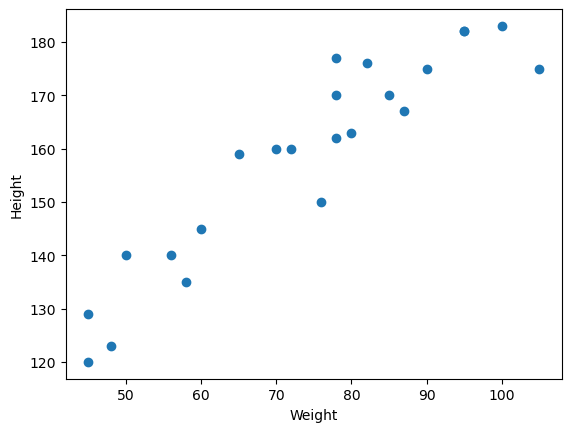

In [5]:
# making a scatterplot of the dataset 

plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

We have to find best fit line through regression

2nd Step

EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [8]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [9]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

Task 3

Dividing the dataset into Independent and Dependent Features

In [11]:
# Dividing the dataset into independent and dependent Features

In [18]:

X = df[['Weight']] # independent features taking into X
y = df['Height'] # Dependent feature

In [20]:
X.shape, y.shape

((23, 1), (23,))

Task 4 

Further Dividing the dataset into Train and Test

In [23]:
# importing library

from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state= 42) # it will take 20% of the record into training the data

In [27]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [28]:
y_train.shape, y_test.shape

((18,), (5,))

Task 5

Using Standard scaling on the Train and Test data

In [29]:
# Standard Scaling can be used to reduce the value from -z to 1 which will help in the effective evaluation of the data

In [30]:
# importing library

from sklearn.preprocessing import StandardScaler

In [31]:
# making object 

scaler = StandardScaler()

In [34]:
X_train = scaler.fit_transform(X_train) # we will use fit_transform into train data only. in the test data, we will use the transform only

In [35]:
X_test = scaler.transform(X_test)

In [37]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

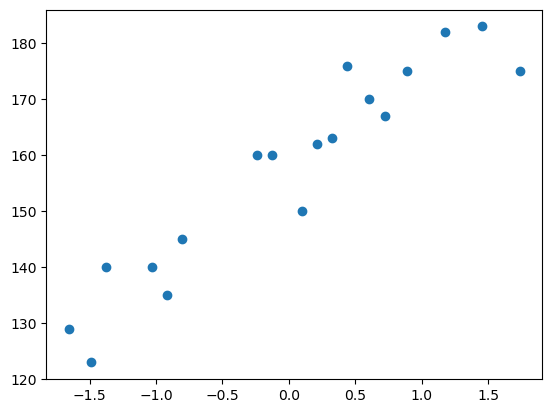

In [39]:
plt.scatter(X_train, y_train)

Task 6 

Model Training

In [40]:
# Model Training

from sklearn.linear_model import LinearRegression

In [41]:
regressor = LinearRegression()

In [42]:
# Training the Train data

regressor.fit(X_train, y_train)

LinearRegression()

In [49]:
regressor.intercept_ # intercept (theta 0)

157.5

In [48]:
regressor.coef_ # coefficient (Theta 1)

array([17.03440872])

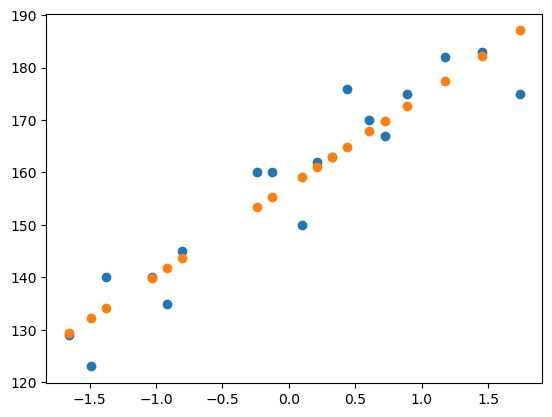

In [52]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regressor.predict(X_train))

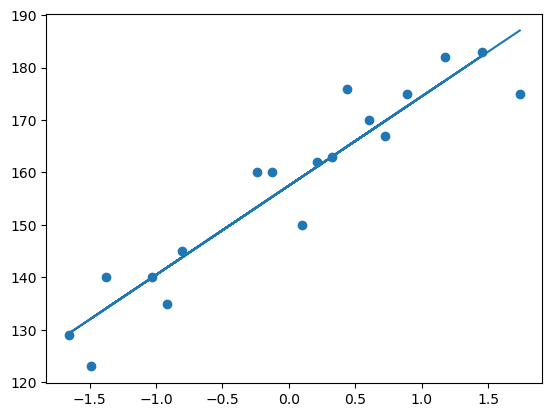

In [54]:
# or creating a bar line 

plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train))

# Prediction of the test data

1. predicted height output = intercept + coef_(Weight)

2. y_pred_train = 157.5 + 17.03X()

# Prediction of tthe test data

- Predicted height output = intercept + coef_(Weights)
- y_pred_test = 157.5 + 17.03(X-Test)

In [55]:
# Prediction for the test data

y_pred_test = regressor.predict(X_test)

In [56]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [57]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

# Performance Metrics MAE, MSE, RMSE

In [59]:
# Importing library

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [63]:
# Accuracy of the model, R Squared and Adjusted R Squared

In [64]:
# importing library

from sklearn.metrics import r2_score

In [65]:
score = r2_score(y_test, y_pred_test)
score

0.776986986042344

In [66]:
# Display adjusted r square

1- (1 - score) * (len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

0.7026493147231252